In [22]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

import geopandas as gpd

In [23]:
gawler_mines = gpd.read_file('E:/Gawler/mines_and_mineral_occurrences_all_shp/mines_and_mineral_occurrences_all.shp')

In [24]:
gawler_mines

,MINDEP_NO,DEP_NAME,REFERENCE,COMM_CODE,COMMODS,COMMOD_MAJ,COMM_SPECS,GCHEM_ASSC,DISC_YEAR,CLASS_CODE,...,ZONE,LONGITUDE,LATITUDE,SVY_METHOD,HORZ_ACC,SRCE_MAP,SRCE_CNTRE,COMMENTS,O_MAP_SYMB,geometry
0,59,MARRYAT EAST,RB 73/91,Ni,Nickel,Ni,ELMT,Ni,1973.0,OCCURRENCE,...,53,132.750646,-26.212428,"Sourced from documents (PLANS, ENV, RB,etc)",200.0,50K GEOL,o/c on small hill,None,Mg,POINT (132.7506363750001 -26.21244280099995)
1,57,FRAZERS,MR 135,Cu,Copper,Cu,ELMT,Cu-Ni,1973.0,OCCURRENCE,...,53,132.549807,-26.185500,(DISUSED) Map Plot,20.0,"50K GEOL, 1971-0772",near hole FPD 1,PROSPECT MARKED ON 50K GEOL,LMb,POINT (132.549796376 -26.18551460899994)
2,52,ONE STONE,MRR 138,Ni,Nickel,Ni,ELMT,Ni-Cr,1975.0,OCCURRENCE,...,53,132.775358,-26.107124,"Sourced from documents (PLANS, ENV, RB,etc)",500.0,71-385,None,None,T\si,POINT (132.775348806 -26.10713862199998)
3,51,WATERHOLE,RB 91/103,Ni,Nickel,Ni,ELMT,Ni,1991.0,OCCURRENCE,...,53,132.848242,-26.378368,Google Earth image,20.0,50K MAP,o/c,None,T\si,POINT (132.848232047 -26.37838237099993)
4,73,MOUNT DAVIES NO.6,RB 79/118,"CYP, AGA, Ni","Chrysoprase, Agate, Nickel",CYP,MIN,None,1979.0,OCCURRENCE,...,52,129.234480,-26.177376,Digital Image,5.0,None,None,None,T\dw,POINT (129.2344712620001 -26.17738992599993)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8672,8628,TOOLIGIE,Env 11185,"Zn, COAL, Mn, Pb","Zinc, Coal, Manganese, Lead",Zn,ELMT,Mn-Pb-Zn,2006.0,OCCURRENCE,...,53,135.684873,-33.859858,"Sourced from documents (PLANS, ENV, RB,etc)",50.0,None,near hole BLDD01,None,hy,POINT (135.6848631250001 -33.85987164199997)
8673,11584,TOOLIGIE LIGNITE,Env 11215,COAL,Coal,COAL,ROCK,None,1990.0,OCCURRENCE,...,53,135.726543,-33.828945,"Sourced from documents (PLANS, ENV, RB,etc)",50.0,None,near KM30 DH30,None,T,POINT (135.7265335100001 -33.82895848999993)
8674,10912,FITTON NORTH,None,Au,Gold,Au,ELMT,None,1965.0,OCCURRENCE,...,54,139.492729,-29.917154,"Sourced from documents (PLANS, ENV, RB,etc)",100.0,None,None,"sample # 35,309",qz,POINT (139.492721971 -29.91716802199994)
8675,10926,TEROWIE NORTH,RB 2012/6,"DIA, PHOS","Diamond, Phosphate",DIA,MIN,None,1991.0,OCCURRENCE,...,54,138.912469,-33.154905,"Sourced from documents (PLANS, ENV, RB,etc)",20.0,None,None,"sample no. 60,853.",lp,POINT (138.9124619910001 -33.15491775899994)


In [25]:
gawler_mines.COMMOD_MAJ.value_counts()

Cu       1422
Au       1280
SAND      559
CALI      452
LMST      405
         ... 
Ra          1
GRNTK       1
TOZ         1
Ta          1
Hg          1
Name: COMMOD_MAJ, Length: 111, dtype: int64

In [26]:
gawler_mines.columns

Index(['MINDEP_NO', 'DEP_NAME', 'REFERENCE', 'COMM_CODE', 'COMMODS',
       'COMMOD_MAJ', 'COMM_SPECS', 'GCHEM_ASSC', 'DISC_YEAR', 'CLASS_CODE',
       'OPER_TYPE', 'MAP_SYMB', 'STATUS_VAL', 'SIZE_VAL', 'GEOL_PROV',
       'DB_RES_RVE', 'DB_PROD', 'DB_DOC_IMG', 'DB_EXV_IMG', 'DB_DEP_IMG',
       'DB_DEP_FLE', 'COX_CLASS', 'REG_O_CTRL', 'LOC_O_CTRL', 'LOC_O_COM',
       'O_LITH_CDE', 'O_LITH01', 'O_STRAT_NM', 'H_LITH_CDE', 'H_LITH02',
       'H_STRAT_NM', 'H_MAP_SYMB', 'EASTING', 'NORTHING', 'ZONE', 'LONGITUDE',
       'LATITUDE', 'SVY_METHOD', 'HORZ_ACC', 'SRCE_MAP', 'SRCE_CNTRE',
       'COMMENTS', 'O_MAP_SYMB', 'geometry'],
      dtype='object')

In [27]:
metals = ('Cu', 'Au', 'Fe', 'Ag', 'Pb', 'Zn', 'Co', 'Ni', 'Cr', 'Mn', 'Ti', 'V', 'PGE', 'Mo', 'W', 'Sn', 'REE', 'U')

gawler_mines_metal = gawler_mines[gawler_mines["COMMOD_MAJ"].isin(metals)]

In [28]:
gawler_mines_metal.CLASS_CODE.value_counts()

OCCURRENCE        3455
DEPOSIT            208
PROSPECT           115
TREATMENT SITE      17
Name: CLASS_CODE, dtype: int64

In [29]:
gawler_mines_metal.SIZE_VAL.value_counts()

Low Significance            3534
Locally Significant          219
Significant to SA             30
Significant to Australia       4
World-wide Significance        2
Name: SIZE_VAL, dtype: int64

In [30]:
gawler_mines_metal

,MINDEP_NO,DEP_NAME,REFERENCE,COMM_CODE,COMMODS,COMMOD_MAJ,COMM_SPECS,GCHEM_ASSC,DISC_YEAR,CLASS_CODE,...,ZONE,LONGITUDE,LATITUDE,SVY_METHOD,HORZ_ACC,SRCE_MAP,SRCE_CNTRE,COMMENTS,O_MAP_SYMB,geometry
0,59,MARRYAT EAST,RB 73/91,Ni,Nickel,Ni,ELMT,Ni,1973.0,OCCURRENCE,...,53,132.750646,-26.212428,"Sourced from documents (PLANS, ENV, RB,etc)",200.0,50K GEOL,o/c on small hill,None,Mg,POINT (132.7506363750001 -26.21244280099995)
1,57,FRAZERS,MR 135,Cu,Copper,Cu,ELMT,Cu-Ni,1973.0,OCCURRENCE,...,53,132.549807,-26.185500,(DISUSED) Map Plot,20.0,"50K GEOL, 1971-0772",near hole FPD 1,PROSPECT MARKED ON 50K GEOL,LMb,POINT (132.549796376 -26.18551460899994)
2,52,ONE STONE,MRR 138,Ni,Nickel,Ni,ELMT,Ni-Cr,1975.0,OCCURRENCE,...,53,132.775358,-26.107124,"Sourced from documents (PLANS, ENV, RB,etc)",500.0,71-385,None,None,T\si,POINT (132.775348806 -26.10713862199998)
3,51,WATERHOLE,RB 91/103,Ni,Nickel,Ni,ELMT,Ni,1991.0,OCCURRENCE,...,53,132.848242,-26.378368,Google Earth image,20.0,50K MAP,o/c,None,T\si,POINT (132.848232047 -26.37838237099993)
5,69,KALKA,RB 91/103,"V, ILM","Vanadium, Ilmenite",V,ELMT,Fe-V-Ti,1968.0,OCCURRENCE,...,52,129.116042,-26.124516,(DISUSED) Map Plot,100.0,1 MILE,mgt polygon on digital map,None,Mg2,POINT (129.116030729 -26.12453006599998)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8669,8547,ULTIMA DAM EAST,Env 10323,"Fe, Au, U","Iron, Gold, Uranium",Fe,ELMT,Fe-Au-U-(As-Co),2009.0,DEPOSIT,...,53,136.474699,-32.734113,"Sourced from documents (PLANS, ENV, RB,etc)",20.0,None,near hole 11UEDH004,None,sk,POINT (136.4746908320001 -32.73412673099995)
8670,11522,TALLARINGA,Env 11378,"U, Th","Uranium, Thorium",U,ELMT,None,2006.0,OCCURRENCE,...,53,133.205128,-29.334118,"Sourced from documents (PLANS, ENV, RB,etc)",50.0,None,hole IGA069,None,Tig,POINT (133.20511991 -29.33413199499995)
8671,11614,BACKWATER,Env 3427,"Pb, Zn","Lead, Zinc",Pb,ELMT,None,1980.0,OCCURRENCE,...,54,138.809122,-31.041003,"Sourced from documents (PLANS, ENV, RB,etc)",50.0,None,near WD 1,None,hy,POINT (138.809115385 -31.04101655799997)
8672,8628,TOOLIGIE,Env 11185,"Zn, COAL, Mn, Pb","Zinc, Coal, Manganese, Lead",Zn,ELMT,Mn-Pb-Zn,2006.0,OCCURRENCE,...,53,135.684873,-33.859858,"Sourced from documents (PLANS, ENV, RB,etc)",50.0,None,near hole BLDD01,None,hy,POINT (135.6848631250001 -33.85987164199997)


In [46]:
import folium

import folium.plugins

gawler_coords = [-32,135]

map = folium.Map(tiles='https://server.arcgisonline.com/ArcGIS/rest/services/World_Imagery/MapServer/tile/{z}/{y}/{x}', 
                 width = 640, height=480, attr="<a href=https://opentopomap.org/>OpenTopoMap</a>",
                 location=gawler_coords, zoom_start= 6)

mc = folium.plugins.MarkerCluster()

for index, row in gawler_mines_metal.iterrows():

    mc.add_child(folium.Marker([row['LATITUDE'], row['LONGITUDE']], radius=1))

map.add_child(mc)
    
map

In [43]:
gawler_mines_metal.columns

Index(['MINDEP_NO', 'DEP_NAME', 'REFERENCE', 'COMM_CODE', 'COMMODS',
       'COMMOD_MAJ', 'COMM_SPECS', 'GCHEM_ASSC', 'DISC_YEAR', 'CLASS_CODE',
       'OPER_TYPE', 'MAP_SYMB', 'STATUS_VAL', 'SIZE_VAL', 'GEOL_PROV',
       'DB_RES_RVE', 'DB_PROD', 'DB_DOC_IMG', 'DB_EXV_IMG', 'DB_DEP_IMG',
       'DB_DEP_FLE', 'COX_CLASS', 'REG_O_CTRL', 'LOC_O_CTRL', 'LOC_O_COM',
       'O_LITH_CDE', 'O_LITH01', 'O_STRAT_NM', 'H_LITH_CDE', 'H_LITH02',
       'H_STRAT_NM', 'H_MAP_SYMB', 'EASTING', 'NORTHING', 'ZONE', 'LONGITUDE',
       'LATITUDE', 'SVY_METHOD', 'HORZ_ACC', 'SRCE_MAP', 'SRCE_CNTRE',
       'COMMENTS', 'O_MAP_SYMB', 'geometry'],
      dtype='object')

In [48]:
map = folium.Map(tiles='https://server.arcgisonline.com/ArcGIS/rest/services/World_Imagery/MapServer/tile/{z}/{y}/{x}', 
                 width = 640, height=480, attr="<a href=https://opentopomap.org/>OpenTopoMap</a>",
                 location=gawler_coords, zoom_start= 6)

deposits = gawler_mines_metal[gawler_mines_metal.CLASS_CODE == 'DEPOSIT']

sa_state_poly = gpd.read_file('E:\Gawler\sastatepolygon')



mc = folium.plugins.MarkerCluster()

#folium.GeoJson(sa_state_poly).add_to(map)

for index, row in deposits.iterrows():

    mc.add_child(folium.Marker([row['LATITUDE'], row['LONGITUDE']],
                               popup=[row.DEP_NAME, row.COMM_CODE, row.GCHEM_ASSC], radius=1))
    
map.add_child(mc)


    
map

In [49]:
map.save('deposit_map.html')

Makes sense to want to know the closest deposit in the Gawler, get all of the features from that

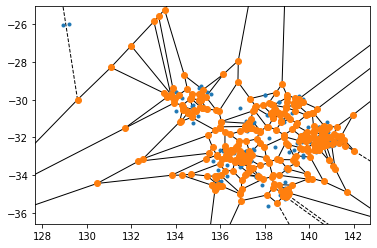

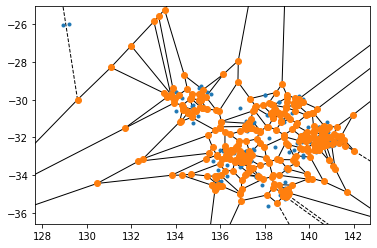

In [12]:
import numpy as np
from scipy.spatial import Voronoi, voronoi_plot_2d
import shapely.geometry
import shapely.ops

points = np.vstack((deposits.geometry.x.values, deposits.geometry.y.values)).T
vor = Voronoi(points)
voronoi_plot_2d(vor)

Potentially more useful:

Create a KDTree
